**해군사 AI 과정**

Day 4: 딥러닝 기초 I (2021-06-03)

User: 문영제

실습 #3: 신경망 모형의 초모수 결정 / Early-Stopping 실습

## 1. 학습률 스케줄링 하기



In [1]:
# keras 라이브러리 가져오기

import keras
import tensorflow as tf

In [2]:
# MNIST 패션 데이터 로딩

fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# target 의 각 숫자값에 해당하는 클래스 명 지정

class_names=["T-shirt/top", 'Trouser', 'Pullover', 'Dress', "Coat", 
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터 (valdiation set) 으로 분리
# 분리와 동시에 정규화

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0

In [6]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 


model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28])) # (28, 28)과 같음

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 1.1 power scheduling

In [9]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)
### power scheduling 으로 학습률을 스케줄링하기 !!  

optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])


In [10]:
# epoch 개수를 30개로 설정하여 모형 학습

history=model.fit(X_train, y_train, epochs=30, 
                  validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 2ms/step - loss: 0.9924 - accuracy: 0.6776 - val_loss: 0.5151 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5117 - accuracy: 0.8240 - val_loss: 0.4673 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.8431 - val_loss: 0.4302 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4264 - accuracy: 0.8508 - val_loss: 0.4090 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4049 - accuracy: 0.8598 - val_loss: 0.4118 - val_accuracy: 0.8550
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8613 - val_loss: 0.4074 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8682 - val_loss: 0.3844 - val_accuracy

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8709


[0.3618184030056, 0.8708999752998352]

### 1.2 Exponential scheduling

In [12]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])


In [14]:
# callback 으로 scheduler 지정하기

def exponential_decay_fn(epoch, lr):
  return lr*0.1**(1/20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)


In [15]:
# 모형 학습

history=model.fit(X_train, y_train, epochs=30, 
                  validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0312 - accuracy: 0.6585 - val_loss: 0.5167 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5103 - accuracy: 0.8246 - val_loss: 0.4737 - val_accuracy: 0.8370
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8409 - val_loss: 0.4344 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4347 - accuracy: 0.8477 - val_loss: 0.4123 - val_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4141 - accuracy: 0.8558 - val_loss: 0.4168 - val_accuracy: 0.8580
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8636 - val_loss: 0.3851 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3870 - accuracy: 0.8635 - val_loss: 0.3825 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8647


[0.3769843280315399, 0.8647000193595886]

### 1.3 Performance scheduling

In [17]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])


In [19]:
# callback 으로 scheduler 지정하기

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [20]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0008 - accuracy: 0.6780 - val_loss: 0.5260 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5115 - accuracy: 0.8233 - val_loss: 0.4541 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8396 - val_loss: 0.4280 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4333 - accuracy: 0.8476 - val_loss: 0.4081 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4057 - accuracy: 0.8586 - val_loss: 0.4012 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8635 - val_loss: 0.3877 - val_accuracy: 0.8648
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8686 - val_loss: 0.3694 - val_accuracy:

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8753


[0.35213351249694824, 0.8752999901771545]

## 2. Early-stopping 수행하기

### 2.1 ModelCheckpoint callback 을 이용하는 방법

In [22]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [23]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])

In [24]:
# callback 만들기

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                monitor='val_accuracy', 
                                                save_best_only=True)

In [25]:
#모형 학습하기

history=model.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0004 - accuracy: 0.6882 - val_loss: 0.5050 - val_accuracy: 0.8284
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5002 - accuracy: 0.8277 - val_loss: 0.4656 - val_accuracy: 0.8382
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4531 - accuracy: 0.8398 - val_loss: 0.4173 - val_accuracy: 0.8552
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4215 - accuracy: 0.8523 - val_loss: 0.4071 - val_accuracy: 0.8610
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8602 - val_loss: 0.3987 - val_accuracy: 0.8630
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8605 - val_loss: 0.3743 - val_accuracy: 0.8708
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3649 - accuracy: 0.8725 - val_loss: 0.3566 - val_ac

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8810


[0.4284017086029053, 0.8809999823570251]

위 결과는 Epoch를 100번 했을 때의 성능

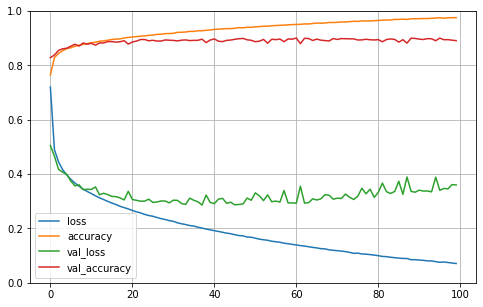

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model2=keras.models.load_model("my_keras_model.h5")

In [29]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8898


[0.33553776144981384, 0.8898000121116638]

위의 결과는 early stopping 했을 때의 evaluation

### 2.2 EarlyStopping callback 을 이용하는 방법

이것은 2.1 방법 (파일에 저장)에 비하여, 학습 중에 early stopping 상황이 생기면, 학습을 멈춘다는 것이 다른 점임

In [30]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

model.add(keras.layers.Dense(10,activation="softmax"))

In [31]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])

In [32]:
# callback 만들기

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                patience=5, 
                                                restore_best_weights=True)

# option : monitor= 

In [33]:
#모형 학습하기

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0306 - accuracy: 0.6708 - val_loss: 0.5161 - val_accuracy: 0.8202
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5099 - accuracy: 0.8212 - val_loss: 0.4489 - val_accuracy: 0.8464
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4586 - accuracy: 0.8411 - val_loss: 0.4059 - val_accuracy: 0.8622
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8584 - val_loss: 0.4076 - val_accuracy: 0.8578
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3967 - accuracy: 0.8612 - val_loss: 0.4001 - val_accuracy: 0.8596
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3815 - accuracy: 0.8667 - val_loss: 0.3797 - val_accuracy: 0.8708
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8714 - val_loss: 0.3681 - val_accuracy:

Epoch 24에서 멈춤

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8765


[0.3466451168060303, 0.8765000104904175]

## 3. 초모수를 자동으로 튜닝하기

In [36]:
# 데이터셋 로딩, 데이터셋 분리, 데이터 정규화에 필요한 패키지 로딩

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
# 데이터셋 로딩

housing=fetch_california_housing()

In [38]:
# 데이터를 학습용 데이터와 테스트용 데이터로 나누기
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터로 나누기

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full)

In [39]:
# 데이터 정규화 하기

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [40]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 1개이며 뉴런이 30개 인 골격 만들기
# 활성함수는 relu 사용하기

model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])

In [41]:
# 모형 컴파일하기(손실함수, 최적화 방법 지정하기) 

model.compile(loss="mean_squared_error", optimizer="sgd")


In [42]:
# epoch 개수를 20개로 설정하여 모형 학습

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1845 - val_loss: 0.5193
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5014 - val_loss: 0.4655
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4848 - val_loss: 0.4429
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4305 - val_loss: 0.4378
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4605 - val_loss: 0.4277
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4396 - val_loss: 0.4224
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4445 - val_loss: 0.4181
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4229 - val_loss: 0.4110
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3996 - val_loss: 0.4071
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4197 - val_loss: 0.4010

In [43]:
# 학습 결과 확인하기

mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3930


### 3.1 위의 전 과정을 수행하는 KerasRegressor 의 생성

In [45]:
# 모형의 골격 및 컴파일 과정을 하나의 함수로 만들기

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  
  model.add(keras.layers.Dense(1))
  
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  
  model.compile(loss="mse", optimizer=optimizer)
  
  return model

In [46]:
# KerasRegressor 생성하기
# 초모수 학습 객체
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [47]:
# KerasRegressor 를 일반 sklearn 의 regressor 처럼 사용하여 모형 학습하기

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.3727 - val_loss: 0.7188
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7364 - val_loss: 0.6403
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6366 - val_loss: 0.5833
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5496
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5504 - val_loss: 0.5229
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5243 - val_loss: 0.5014
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5335 - val_loss: 0.4895
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5105 - val_loss: 0.4776
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4940 - val_loss: 0.4713
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4586 - val_lo

In [48]:
mse_test=keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3586


In [51]:
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)
print(y_pred)
print(y_test[:3])

[1.4918419 0.957726  1.7136129]
[1.5   0.62  1.588]


### 3.2 KerasRegressor 와 RandomizedSearchCV 를 이용하여 초모수 선택을 자동화하기

In [52]:
# 위의 KerasRegressor에 이어서...

# 필요 패키지 불러오기

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

In [54]:
# 초모수 후보 (KerasRegressor 의 input) 지정하기

param_distribs={
    "n_hidden" : (0, 1, 2, 3),
    "n_neurons" : (10, 20),
    "learning_rate" : (3e-4, 3e-2)
}

In [55]:
# Early Stopping 적용 포함하여, 100 epoch를 10번 돌면서 찾아내기!
rnd_search_cv=RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train,y_train, epochs=100, 
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2976 - val_loss: 0.5580
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [=====================

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcb5a89f690>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': (0.0003, 0.03),
                                        'n_hidden': (0, 1, 2, 3),
                                        'n_neurons': (10, 20)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [56]:
# 선택된 초모수 출력하기

rnd_search_cv.best_params_

{'learning_rate': 0.03, 'n_hidden': 2, 'n_neurons': 10}

In [59]:
# 선택된 초모수에서의 score 출력하기

rnd_search_cv.best_score_

-0.36204175154368085

In [61]:
# 선택된 초모수에 해당하는 모형 선택하기

model = rnd_search_cv.best_estimator_.model